In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('Mall_Customers.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Genre                  

In [12]:
#Univariate Analysis

<Axes: xlabel='Genre', ylabel='count'>

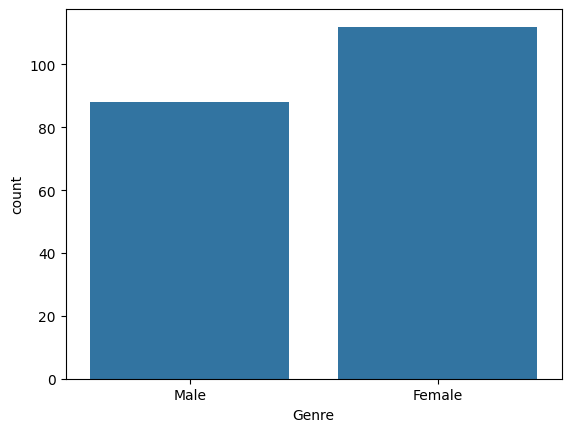

In [14]:
# Gender distribution
sns.countplot(data=df, x='Genre')

<Axes: xlabel='Age', ylabel='Count'>

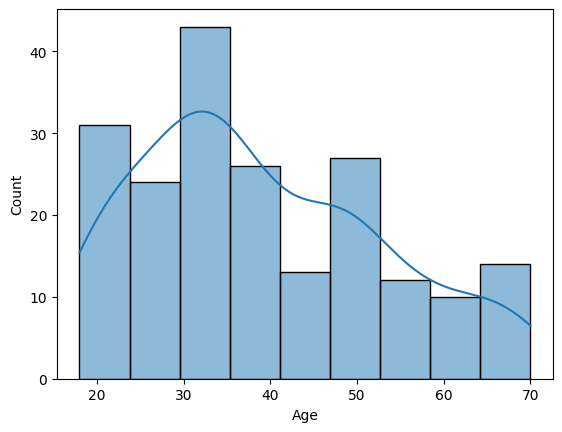

In [15]:
# Age
sns.histplot(df['Age'], kde=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

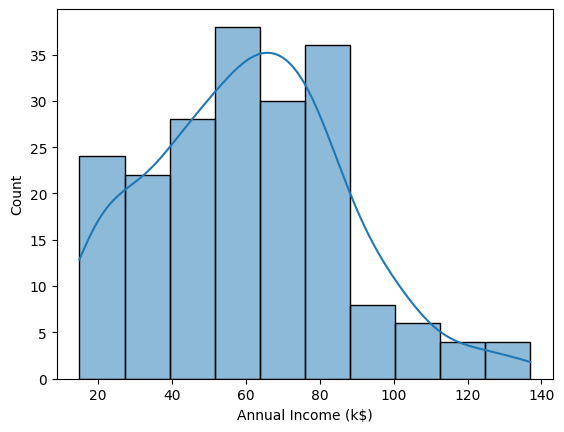

In [16]:
# Income
sns.histplot(df['Annual Income (k$)'], kde=True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

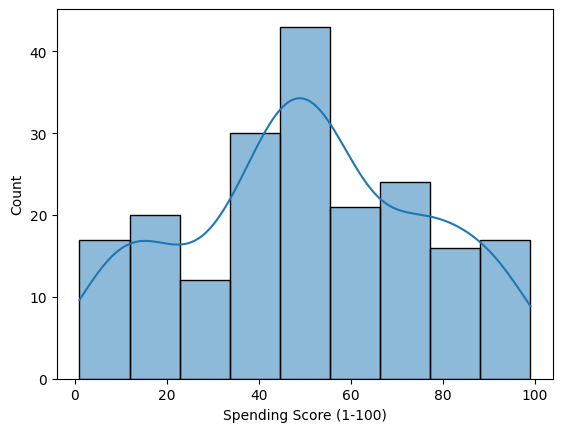

In [17]:
# Spending Score
sns.histplot(df['Spending Score (1-100)'], kde=True)

In [18]:
#Bivariate Analysis

<Axes: xlabel='Genre', ylabel='Spending Score (1-100)'>

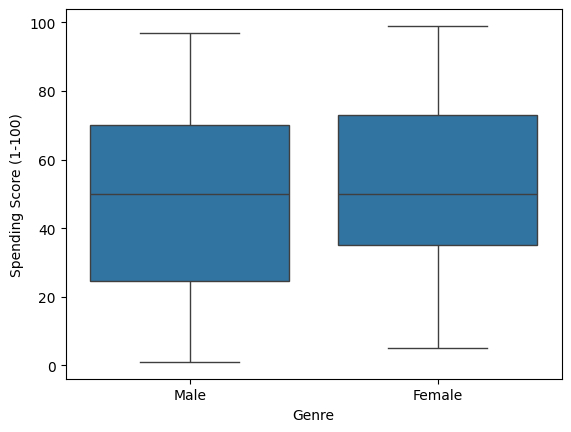

In [20]:
# Gender vs Spending
sns.boxplot(data=df, x='Genre', y='Spending Score (1-100)')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

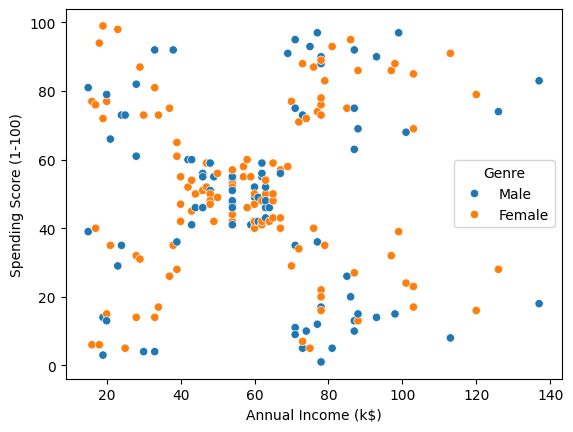

In [22]:
# Income vs Spending
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre')

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

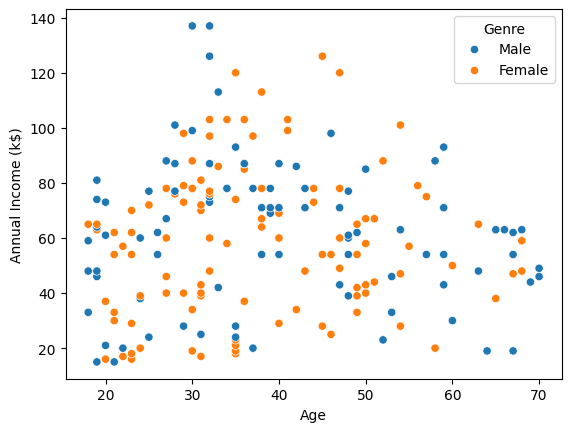

In [23]:
# Age vs Income
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Genre')

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [26]:
#KMeans Clustering and PCA Visualization

In [28]:
# Select relevant features
features = ['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Encode categorical 'Gender'
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

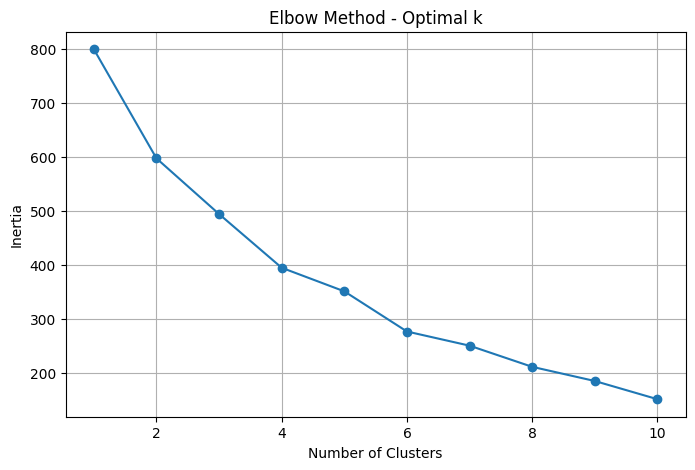

In [29]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - Optimal k')
plt.grid(True)
plt.show()

In [30]:
# Fit final model
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [31]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

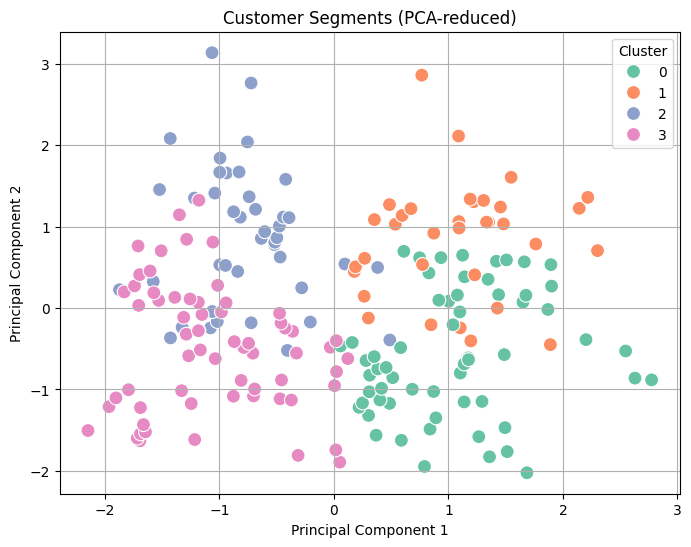

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()